# **Waste Material Segregation for Improving Waste Management**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [3]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [4]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PIL as pil
import tensorflow as tf
import keras
import sklearn


Load the dataset.

In [5]:
# Load and unzip the dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/data.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/')
zip_ref.close()

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [6]:
# Create a function to load the raw images
#these images are RGB

def load_raw_images(filepath):
    img = pil.Image.open(filepath)
    img = img.convert('RGB')
    return img


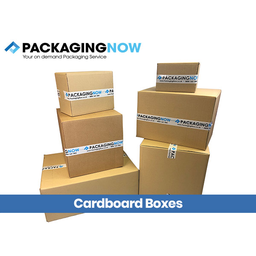

In [7]:
#testing the function
load_raw_images('/content/drive/MyDrive/data/Cardboard/file_110.png')

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [8]:
# Get the images and their labels
#image arraya nd label array,then iterate over data directory path and find out labels present
#each label dire we have to take it up,if present iterate over files present
#you will read that file then load this image the bove function to be used
#make random samples flenames and correspondign annotation iamge and the label


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

In [9]:
# Get the images and their labels
import os
def get_images_And_labels(dataset_path):
  images =[]
  labels = []
  for label_folder in os.listdir(dataset_path):
    label_folder_path = os.path.join(dataset_path, label_folder)
    if os.path.isdir(label_folder_path): #check if its a directory(label folder)
      for filename in os.listdir(label_folder_path):
        img_path = os.path.join(label_folder_path, filename)
        img = load_raw_images(img_path)
        images.append(img)
        labels.append(label_folder)
  return images,labels


In [10]:
#testing get_images_And_labels function
dataset_path = '/content/drive/MyDrive/data'
images, labels = get_images_And_labels(dataset_path)
print(f"Loaded {len(images)} images with {len(labels)} labels")

Loaded 7625 images with 7625 labels


In [11]:
#make random samples flenames and correspondign annotation iamge and the label
import random

def get_random_samples(images, labels, num_samples):

    sample_indices = random.sample(range(len(images)), num_samples)
    sample_images = [images[i] for i in sample_indices]
    sample_labels = [labels[i] for i in sample_indices]

    filenames = []
    for i in sample_indices:
        # Replace this logic to get actual filenames based on your data structure
        filenames.append(f"image_{i}.jpg")

    return filenames, sample_images, sample_labels



In [12]:
# Example usage:
filenames, sample_images, sample_labels = get_random_samples(images, labels, num_samples=3)

for filename, image, label in zip(filenames, sample_images, sample_labels):
    print(f"Filename: {filename}, Label: {label}")
    #display(image)

Filename: image_171.jpg, Label: Food_Waste
Filename: image_5014.jpg, Label: Metal
Filename: image_681.jpg, Label: Food_Waste


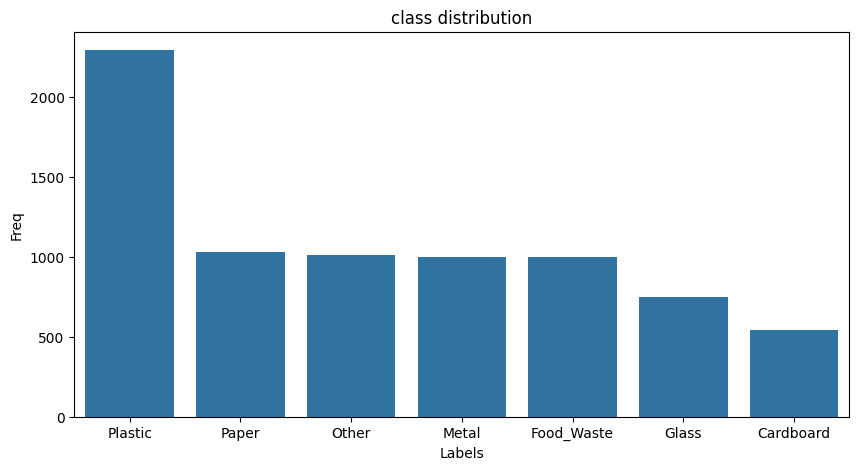

In [13]:
# Visualise Data Distribution
#frequency of each label in the dataset


# we have labels list from get_images_And_labels
label_counts = pd.Series(labels).value_counts()
label_counts
plt.figure(figsize=(10,5))
sns.barplot(x=label_counts.index, y = label_counts.values)
plt.title('class distribution')
plt.xlabel('Labels')
plt.ylabel('Freq')
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [14]:
# Visualise Sample Images (across different labels)

filenames, sample_images, sample_labels = get_random_samples(images, labels, num_samples=10)

for filename, image, label in zip(filenames, sample_images, sample_labels):
    print(f"Label: {label}")
   # display(image)

Label: Other
Label: Food_Waste
Label: Glass
Label: Plastic
Label: Plastic
Label: Food_Waste
Label: Paper
Label: Paper
Label: Food_Waste
Label: Other


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [15]:
# Find the smallest and largest image dimensions from the data set

# we already have  get_images_And_labels function defined
images, labels = get_images_And_labels(dataset_path)

# Get dimensions using list comprehension
dimensions = [img.size for img in images]

# Find min and max dimensions using built-in functions with key argument
min_width, min_height = min(dimensions, key=lambda x: x[0])[0], min(dimensions, key=lambda x: x[1])[1]
max_width, max_height = max(dimensions, key=lambda x: x[0])[0], max(dimensions, key=lambda x: x[1])[1]
# Find indices of smallest and largest images
min_index = dimensions.index(min(dimensions))
max_index = dimensions.index(max(dimensions))

# Get the smallest and largest images
smallest_image = images[min_index]
largest_image = images[max_index]

print(f"Smallest dimensions: {min_width} x {min_height}" )
#smallest_image
print(f"Largest dimensions: {max_width} x {max_height}")
#largest_image

Smallest dimensions: 256 x 256
Largest dimensions: 256 x 256


# **Resizing the pixels of all folders before feeding to traina nd split**

I delebrately done the resize for the efficiency of the configurations to try in the training as the pixel 256*256 is crashing the kernel

In [16]:
# Resize the image dimensions
import os
from PIL import Image

def resize_all_images(dataset_path, new_width, new_height):
    """Resizes all images in the dataset to a specified size.

    Args:
        dataset_path (str): Path to the dataset directory.
        new_width (int): Desired width of the resized images.
        new_height (int): Desired height of the resized images.
    """

    for label_folder in os.listdir(dataset_path):
        label_folder_path = os.path.join(dataset_path, label_folder)
        if os.path.isdir(label_folder_path):  # Check if it's a directory (label folder)
            for filename in os.listdir(label_folder_path):
                img_path = os.path.join(label_folder_path, filename)

                try:  # Handle potential errors during image processing
                    # Open the image using Pillow
                    img = Image.open(img_path)
                    img = img.convert('RGB')  # Ensure the image is in RGB format

                    # Resize the image
                    img = img.resize((new_width, new_height))

                    # Save the resized image back to the original location
                    img.save(img_path)

                    print(f"Resized: {img_path}")

                except Exception as e:
                    print(f"Error processing {img_path}: {e}")

# Set the desired dimensions
new_width = 128  # Set your desired width
new_height = 128 # Set your desired height

# Call the function to resize all images in the dataset
dataset_path = '/content/drive/MyDrive/data'
resize_all_images(dataset_path, new_width, new_height)

Streaming output truncated to the last 5000 lines.
Resized: /content/drive/MyDrive/data/Other/file_144.png
Resized: /content/drive/MyDrive/data/Other/file_510.png
Resized: /content/drive/MyDrive/data/Other/file_69.png
Resized: /content/drive/MyDrive/data/Other/file_982.png
Resized: /content/drive/MyDrive/data/Other/file_346.png
Resized: /content/drive/MyDrive/data/Other/file_740.png
Resized: /content/drive/MyDrive/data/Other/file_50.png
Resized: /content/drive/MyDrive/data/Other/file_838.png
Resized: /content/drive/MyDrive/data/Other/file_94.png
Resized: /content/drive/MyDrive/data/Other/file_97.png
Resized: /content/drive/MyDrive/data/Other/file_60.png
Resized: /content/drive/MyDrive/data/Other/file_380.png
Resized: /content/drive/MyDrive/data/Other/file_369.png
Resized: /content/drive/MyDrive/data/Other/file_604.png
Resized: /content/drive/MyDrive/data/Other/file_678.png
Resized: /content/drive/MyDrive/data/Other/file_70.png
Resized: /content/drive/MyDrive/data/Other/file_743.png
Res

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [17]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels) # Now 'encoded_labels' contains the numerical representation of the labels

In [18]:
# reloading the resized images

import os
from PIL import Image


def get_images_And_labels(dataset_path):
    """Loads images and labels from the dataset directory."""

    images = []
    labels = []
    for label_folder in os.listdir(dataset_path):
        label_folder_path = os.path.join(dataset_path, label_folder)
        if os.path.isdir(label_folder_path):
            for filename in os.listdir(label_folder_path):
                img_path = os.path.join(label_folder_path, filename)

                # Reload the image (it should now be resized)
                img = Image.open(img_path)
                img = img.convert('RGB')

                images.append(img)
                labels.append(label_folder)
    return images, labels


dataset_path = '/content/drive/MyDrive/data'
images, labels = get_images_And_labels(dataset_path)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

In [19]:
#shapes after resize 128*128

# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split # Import train_test_split

# Correct the variable assignment order
X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)

# Convert the image data to numpy arrays
X_train = np.array([np.array(img) for img in X_train])
X_val = np.array([np.array(img) for img in X_val])

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (6100, 128, 128, 3)
X_val shape: (1525, 128, 128, 3)
y_train shape: (6100,)
y_val shape: (1525,)


#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [37]:
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2

configurations =[
    {'name':'Config 1', 'filters': 32, 'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.2, 'conv_layers':3, 'l2_reg': 0.01},
    {'name':'Config 2', 'filters': 64, 'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.3, 'conv_layers':3, 'l2_reg': 0.01},
    {'name':'Config 3', 'filters': 128, 'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.4, 'conv_layers':3, 'l2_reg': 0.01},
]

# Create a function to build the model
def create_model(config):
    model = Sequential()
    #Corrected the key from 'conv layers' to 'conv_layers'
    for i in range(config['conv_layers']):
        model.add(Conv2D(config['filters'], config['kernel_size'], activation=config['activation'], input_shape=(128, 128, 3))) #filters should be an integer, not a list
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=config['pool_size']))
        model.add(Dropout(config['dropout_rate']))
    model.add(Flatten())
    #model.add(Dense(128, activation='relu', kernel_regularizer=l2(config['l2_reg'])))
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(config['l2_reg'])))
    model.add(Dropout(config['dropout_rate']))
    model.add(Dense(len(set(encoded_labels)), activation='softmax'))
    return model

Next trial with l2_reg

saving trained one

In [38]:
# Training
epochs = 50
batch_size = 128
history_dict = {}
best_accuracy = 0  # Initialize best accuracy
best_model = None  # Initialize best model

for config in configurations:
    model = create_model(config)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Add ModelCheckpoint callback
    from tensorflow.keras.callbacks import ModelCheckpoint
    checkpoint = ModelCheckpoint(f"best_model_{config['name']}.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[checkpoint])

    history_dict[config['name']] = history.history
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")

    # Update best accuracy and model if current model is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Save the overall best model
best_model.save("best_model.h5")
print(f"Best Model saved with Validation Accuracy: {best_accuracy}")

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.2867 - loss: 13.1045
Epoch 1: val_accuracy improved from -inf to 0.20066, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - accuracy: 0.2876 - loss: 13.0546 - val_accuracy: 0.2007 - val_loss: 8.0588
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4660 - loss: 6.7193
Epoch 2: val_accuracy improved from 0.20066 to 0.29180, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.4662 - loss: 6.7049 - val_accuracy: 0.2918 - val_loss: 5.1729
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5548 - loss: 4.2343
Epoch 3: val_accuracy improved from 0.29180 to 0.38557, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5546 - loss: 4.2283 - val_accuracy: 0.3856 - val_loss: 3.8145
Epoch 4/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6048 - loss: 3.0821
Epoch 4: val_accuracy improved from 0.38557 to 0.43803, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.6045 - loss: 3.0765 - val_accuracy: 0.4380 - val_loss: 3.2041
Epoch 5/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6809 - loss: 2.4393
Epoch 5: val_accuracy improved from 0.43803 to 0.52525, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6797 - loss: 2.4394 - val_accuracy: 0.5252 - val_loss: 2.6760
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7150 - loss: 2.1602
Epoch 6: val_accuracy did not improve from 0.52525
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7147 - loss: 2.1603 - val_accuracy: 0.5082 - val_loss: 2.6035
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7522 - loss: 1.9279
Epoch 7: val_accuracy improved from 0.52525 to 0.55869, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7517 - loss: 1.9288 - val_accuracy: 0.5587 - val_loss: 2.5397
Epoch 8/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7898 - loss: 1.8359
Epoch 8: val_accuracy improved from 0.55869 to 0.56984, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7886 - loss: 1.8377 - val_accuracy: 0.5698 - val_loss: 2.4781
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8121 - loss: 1.7624
Epoch 9: val_accuracy improved from 0.56984 to 0.60656, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8117 - loss: 1.7633 - val_accuracy: 0.6066 - val_loss: 2.4018
Epoch 10/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8260 - loss: 1.7068
Epoch 10: val_accuracy did not improve from 0.60656
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8250 - loss: 1.7094 - val_accuracy: 0.4905 - val_loss: 2.7292
Epoch 11/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8466 - loss: 1.6774
Epoch 11: val_accuracy did not improve from 0.60656
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8456 - loss: 1.6798 - val_accuracy: 0.5731 - val_loss: 2.5624
Epoch 12/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8469 - loss: 1.6700
Epoch 12: val_accuracy did not improve from 0.60656
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8460 - loss: 1.6719 - val_accuracy: 0.5751 - val_loss: 2.6394
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8504 - loss: 1.6764
Epoch 13: val_accuracy did not impro

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8893 - loss: 1.5740 - val_accuracy: 0.6354 - val_loss: 2.5326
Epoch 19/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8969 - loss: 1.6128
Epoch 19: val_accuracy did not improve from 0.63541
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8965 - loss: 1.6133 - val_accuracy: 0.5921 - val_loss: 2.6261
Epoch 20/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9021 - loss: 1.5617
Epoch 20: val_accuracy did not improve from 0.63541
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9011 - loss: 1.5640 - val_accuracy: 0.6138 - val_loss: 2.6220
Epoch 21/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8933 - loss: 1.5752
Epoch 21: val_accuracy did not improve from 0.63541
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8930 - loss: 1.5758 - val_accuracy: 0.5534 - val_loss: 2.9172
Epoch 22/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9080 - loss: 1.5579
Epoch 22: val_accuracy did not impro

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9148 - loss: 1.5664 - val_accuracy: 0.6361 - val_loss: 2.5960
Epoch 34/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9187 - loss: 1.5410
Epoch 34: val_accuracy did not improve from 0.63607
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9184 - loss: 1.5416 - val_accuracy: 0.6262 - val_loss: 2.5650
Epoch 35/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9268 - loss: 1.5079
Epoch 35: val_accuracy did not improve from 0.63607
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9262 - loss: 1.5092 - val_accuracy: 0.6085 - val_loss: 2.8130
Epoch 36/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9330 - loss: 1.4585
Epoch 36: val_accuracy did not improve from 0.63607
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9327 - loss: 1.4590 - val_accuracy: 0.5816 - val_loss: 2.8934
Epoch 37/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9225 - loss: 1.4783
Epoch 37: val_accuracy did not impro

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9228 - loss: 1.5057 - val_accuracy: 0.6413 - val_loss: 2.6642
Epoch 39/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9246 - loss: 1.4883
Epoch 39: val_accuracy did not improve from 0.64131
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9242 - loss: 1.4895 - val_accuracy: 0.5115 - val_loss: 3.5754
Epoch 40/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9125 - loss: 1.5172
Epoch 40: val_accuracy did not improve from 0.64131
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9123 - loss: 1.5178 - val_accuracy: 0.5934 - val_loss: 3.0144
Epoch 41/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9236 - loss: 1.5064
Epoch 41: val_accuracy did not improve from 0.64131
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9233 - loss: 1.5068 - val_accuracy: 0.6328 - val_loss: 2.5714
Epoch 42/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9200 - loss: 1.4767
Epoch 42: val_accuracy improved from

48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9194 - loss: 1.4782 - val_accuracy: 0.6426 - val_loss: 2.6451
Epoch 43/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9184 - loss: 1.5256
Epoch 43: val_accuracy did not improve from 0.64262
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9179 - loss: 1.5274 - val_accuracy: 0.4669 - val_loss: 5.4043
Epoch 44/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9193 - loss: 1.5519
Epoch 44: val_accuracy did not improve from 0.64262
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9189 - loss: 1.5531 - val_accuracy: 0.5016 - val_loss: 3.3180
Epoch 45/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9338 - loss: 1.5029
Epoch 45: val_accuracy improved from 0.64262 to 0.65115, saving model to best_model_Config 1.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9333 - loss: 1.5032 - val_accuracy: 0.6511 - val_loss: 2.5651
Epoch 46/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9398 - loss: 1.4107
Epoch 46: val_accuracy did not improve from 0.65115
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9395 - loss: 1.4109 - val_accuracy: 0.6361 - val_loss: 2.6431
Epoch 47/50
47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9300 - loss: 1.3691
Epoch 47: val_accuracy did not improve from 0.65115
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9294 - loss: 1.3713 - val_accuracy: 0.6164 - val_loss: 2.5779
Epoch 48/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9274 - loss: 1.4815
Epoch 48: val_accuracy did not improve from 0.65115
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9272 - loss: 1.4825 - val_accuracy: 0.5967 - val_loss: 2.8076
Epoch 49/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9244 - loss: 1.4967
Epoch 49: val_accuracy did not impro

48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 360ms/step - accuracy: 0.2448 - loss: 18.3080 - val_accuracy: 0.2990 - val_loss: 10.0499
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3958 - loss: 7.8745
Epoch 2: val_accuracy did not improve from 0.29902
48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.3960 - loss: 7.8589 - val_accuracy: 0.2105 - val_loss: 6.0042
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4553 - loss: 5.2104
Epoch 3: val_accuracy did not improve from 0.29902
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.4553 - loss: 5.2033 - val_accuracy: 0.2689 - val_loss: 4.8578
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4984 - loss: 3.9174
Epoch 4: val_accuracy improved from 0.29902 to 0.34689, saving model to best_model_Config 2.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4981 - loss: 3.9155 - val_accuracy: 0.3469 - val_loss: 4.3234
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5363 - loss: 3.3986
Epoch 5: val_accuracy improved from 0.34689 to 0.44525, saving model to best_model_Config 2.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5360 - loss: 3.3986 - val_accuracy: 0.4452 - val_loss: 3.5101
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5626 - loss: 3.1204
Epoch 6: val_accuracy improved from 0.44525 to 0.49377, saving model to best_model_Config 2.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5623 - loss: 3.1205 - val_accuracy: 0.4938 - val_loss: 3.2195
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5936 - loss: 2.8672
Epoch 7: val_accuracy did not improve from 0.49377
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.5933 - loss: 2.8672 - val_accuracy: 0.4361 - val_loss: 3.4999
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6304 - loss: 2.6425
Epoch 8: val_accuracy did not improve from 0.49377
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.6301 - loss: 2.6433 - val_accuracy: 0.3377 - val_loss: 3.7826
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6440 - loss: 2.6775
Epoch 9: val_accuracy did not improve from 0.49377
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6437 - loss: 2.6791 - val_accuracy: 0.4774 - val_loss: 3.5992
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6664 - loss: 2.7619
Epoch 10: val_accuracy did not improve fro

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7012 - loss: 2.6710 - val_accuracy: 0.5062 - val_loss: 3.2162
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7314 - loss: 2.4606
Epoch 12: val_accuracy improved from 0.50623 to 0.56918, saving model to best_model_Config 2.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7310 - loss: 2.4626 - val_accuracy: 0.5692 - val_loss: 3.2401
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7410 - loss: 2.6955
Epoch 13: val_accuracy did not improve from 0.56918
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.7406 - loss: 2.6971 - val_accuracy: 0.5285 - val_loss: 3.4360
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7589 - loss: 2.8175
Epoch 14: val_accuracy did not improve from 0.56918
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7586 - loss: 2.8190 - val_accuracy: 0.4269 - val_loss: 4.1212
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7864 - loss: 2.7870
Epoch 15: val_accuracy did not improve from 0.56918
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.7860 - loss: 2.7871 - val_accuracy: 0.5338 - val_loss: 3.4953
Epoch 16/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8092 - loss: 2.6388
Epoch 16: val_accuracy did not impr

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8521 - loss: 2.5268 - val_accuracy: 0.5790 - val_loss: 3.4260
Epoch 21/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8634 - loss: 2.5552
Epoch 21: val_accuracy improved from 0.57902 to 0.58098, saving model to best_model_Config 2.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8628 - loss: 2.5565 - val_accuracy: 0.5810 - val_loss: 3.4987
Epoch 22/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8567 - loss: 2.5463
Epoch 22: val_accuracy did not improve from 0.58098
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8564 - loss: 2.5462 - val_accuracy: 0.5095 - val_loss: 3.4686
Epoch 23/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8565 - loss: 2.4766
Epoch 23: val_accuracy did not improve from 0.58098
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.8563 - loss: 2.4775 - val_accuracy: 0.5528 - val_loss: 3.5700
Epoch 24/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8907 - loss: 2.3401
Epoch 24: val_accuracy improved from 0.58098 to 0.61246, saving model to best_model_Config 2.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8903 - loss: 2.3398 - val_accuracy: 0.6125 - val_loss: 3.2266
Epoch 25/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8817 - loss: 2.2158
Epoch 25: val_accuracy improved from 0.61246 to 0.62033, saving model to best_model_Config 2.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8812 - loss: 2.2178 - val_accuracy: 0.6203 - val_loss: 3.1892
Epoch 26/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8711 - loss: 2.4412
Epoch 26: val_accuracy did not improve from 0.62033
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8708 - loss: 2.4418 - val_accuracy: 0.5062 - val_loss: 3.8764
Epoch 27/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8882 - loss: 2.3397
Epoch 27: val_accuracy improved from 0.62033 to 0.63344, saving model to best_model_Config 2.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8879 - loss: 2.3393 - val_accuracy: 0.6334 - val_loss: 3.0529
Epoch 28/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8888 - loss: 2.1788
Epoch 28: val_accuracy did not improve from 0.63344
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8885 - loss: 2.1798 - val_accuracy: 0.6013 - val_loss: 3.3689
Epoch 29/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8937 - loss: 2.2256
Epoch 29: val_accuracy did not improve from 0.63344
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8932 - loss: 2.2267 - val_accuracy: 0.6210 - val_loss: 3.2553
Epoch 30/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8807 - loss: 2.3275
Epoch 30: val_accuracy did not improve from 0.63344
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8805 - loss: 2.3283 - val_accuracy: 0.5659 - val_loss: 3.4116
Epoch 31/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8919 - loss: 2.3090
Epoch 31: val_accuracy did not impr

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9103 - loss: 2.1760 - val_accuracy: 0.6525 - val_loss: 3.0853
Epoch 43/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9089 - loss: 2.2106
Epoch 43: val_accuracy did not improve from 0.65246
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9085 - loss: 2.2114 - val_accuracy: 0.4813 - val_loss: 4.0399
Epoch 44/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9109 - loss: 2.2130
Epoch 44: val_accuracy did not improve from 0.65246
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9105 - loss: 2.2139 - val_accuracy: 0.6000 - val_loss: 3.4280
Epoch 45/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9079 - loss: 2.2469
Epoch 45: val_accuracy did not improve from 0.65246
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9076 - loss: 2.2474 - val_accuracy: 0.5089 - val_loss: 4.1731
Epoch 46/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9121 - loss: 2.1755
Epoch 46: val_accuracy improved fro

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9119 - loss: 2.1754 - val_accuracy: 0.6603 - val_loss: 2.9900
Epoch 47/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9086 - loss: 2.0955
Epoch 47: val_accuracy did not improve from 0.66033
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9083 - loss: 2.0964 - val_accuracy: 0.6459 - val_loss: 3.1561
Epoch 48/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9145 - loss: 2.1382
Epoch 48: val_accuracy did not improve from 0.66033
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9142 - loss: 2.1383 - val_accuracy: 0.6459 - val_loss: 3.0968
Epoch 49/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9225 - loss: 2.0513
Epoch 49: val_accuracy did not improve from 0.66033
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.9222 - loss: 2.0521 - val_accuracy: 0.6374 - val_loss: 3.0968
Epoch 50/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9211 - loss: 2.0564
Epoch 50: val_accuracy did not impro

48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 686ms/step - accuracy: 0.2374 - loss: 21.3999 - val_accuracy: 0.2046 - val_loss: 12.0005
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.3460 - loss: 9.3614
Epoch 2: val_accuracy improved from 0.20459 to 0.26230, saving model to best_model_Config 3.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 45s 209ms/step - accuracy: 0.3461 - loss: 9.3418 - val_accuracy: 0.2623 - val_loss: 6.8372
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.3849 - loss: 5.9815
Epoch 3: val_accuracy improved from 0.26230 to 0.35869, saving model to best_model_Config 3.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.3849 - loss: 5.9718 - val_accuracy: 0.3587 - val_loss: 4.9614
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4183 - loss: 4.3773
Epoch 4: val_accuracy did not improve from 0.35869
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.4181 - loss: 4.3750 - val_accuracy: 0.3475 - val_loss: 5.9398
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4377 - loss: 3.8791
Epoch 5: val_accuracy improved from 0.35869 to 0.41443, saving model to best_model_Config 3.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.4375 - loss: 3.8768 - val_accuracy: 0.4144 - val_loss: 3.9445
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4382 - loss: 3.3135
Epoch 6: val_accuracy did not improve from 0.41443
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.4385 - loss: 3.3099 - val_accuracy: 0.4020 - val_loss: 5.0891
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.4650 - loss: 2.9521
Epoch 7: val_accuracy did not improve from 0.41443
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.4649 - loss: 2.9553 - val_accuracy: 0.3823 - val_loss: 3.8880
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.4887 - loss: 3.0508
Epoch 8: val_accuracy did not improve from 0.41443
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.4887 - loss: 3.0493 - val_accuracy: 0.3948 - val_loss: 3.7239
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.4973 - loss: 2.9542
Epoch 9: val_accuracy did not i

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.6322 - loss: 3.1613 - val_accuracy: 0.4702 - val_loss: 4.3165
Epoch 16/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6273 - loss: 3.5795
Epoch 16: val_accuracy did not improve from 0.47016
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.6272 - loss: 3.5818 - val_accuracy: 0.2610 - val_loss: 7.6230
Epoch 17/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6670 - loss: 3.8740
Epoch 17: val_accuracy did not improve from 0.47016
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.6666 - loss: 3.8751 - val_accuracy: 0.4570 - val_loss: 4.4652
Epoch 18/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6829 - loss: 3.7885
Epoch 18: val_accuracy did not improve from 0.47016
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.6824 - loss: 3.7902 - val_accuracy: 0.4570 - val_loss: 5.9433
Epoch 19/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7028 - loss: 4.0135
Epoch 19: val_accuracy d

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.7207 - loss: 4.2143 - val_accuracy: 0.5154 - val_loss: 4.8852
Epoch 21/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7646 - loss: 4.1414
Epoch 21: val_accuracy improved from 0.51541 to 0.55672, saving model to best_model_Config 3.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.7639 - loss: 4.1421 - val_accuracy: 0.5567 - val_loss: 4.8409
Epoch 22/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.7705 - loss: 4.1413
Epoch 22: val_accuracy did not improve from 0.55672
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.7701 - loss: 4.1419 - val_accuracy: 0.5495 - val_loss: 4.9692
Epoch 23/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.7781 - loss: 4.0768
Epoch 23: val_accuracy did not improve from 0.55672
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.7779 - loss: 4.0774 - val_accuracy: 0.5207 - val_loss: 5.1669
Epoch 24/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7923 - loss: 4.0353
Epoch 24: val_accuracy improved from 0.55672 to 0.57705, saving model to best_model_Config 3.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.7919 - loss: 4.0364 - val_accuracy: 0.5770 - val_loss: 4.8613
Epoch 25/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8022 - loss: 4.2516
Epoch 25: val_accuracy did not improve from 0.57705
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.8017 - loss: 4.2538 - val_accuracy: 0.2649 - val_loss: 9.4352
Epoch 26/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8206 - loss: 4.2573
Epoch 26: val_accuracy did not improve from 0.57705
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.8202 - loss: 4.2565 - val_accuracy: 0.5672 - val_loss: 4.8422
Epoch 27/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.8301 - loss: 3.9368
Epoch 27: val_accuracy did not improve from 0.57705
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.8297 - loss: 3.9373 - val_accuracy: 0.5738 - val_loss: 4.8602
Epoch 28/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8352 - loss: 3.8377
Epoch 28: val_accuracy i

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.8347 - loss: 3.8386 - val_accuracy: 0.6190 - val_loss: 4.5739
Epoch 29/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8361 - loss: 3.9228
Epoch 29: val_accuracy did not improve from 0.61902
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.8358 - loss: 3.9233 - val_accuracy: 0.5062 - val_loss: 5.2617
Epoch 30/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8611 - loss: 3.7354
Epoch 30: val_accuracy did not improve from 0.61902
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.8606 - loss: 3.7356 - val_accuracy: 0.4911 - val_loss: 5.5270
Epoch 31/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8501 - loss: 3.7476
Epoch 31: val_accuracy did not improve from 0.61902
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.8497 - loss: 3.7486 - val_accuracy: 0.5915 - val_loss: 4.5708
Epoch 32/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8562 - loss: 3.7098
Epoch 32: val_accuracy d

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.8681 - loss: 3.6328 - val_accuracy: 0.6439 - val_loss: 4.4483
Epoch 34/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8644 - loss: 3.6746
Epoch 34: val_accuracy did not improve from 0.64393
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.8639 - loss: 3.6758 - val_accuracy: 0.5751 - val_loss: 4.6992
Epoch 35/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8694 - loss: 3.7001
Epoch 35: val_accuracy did not improve from 0.64393
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.8689 - loss: 3.7000 - val_accuracy: 0.5711 - val_loss: 4.6963
Epoch 36/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8699 - loss: 3.6379
Epoch 36: val_accuracy did not improve from 0.64393
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.8695 - loss: 3.6393 - val_accuracy: 0.5141 - val_loss: 5.6034
Epoch 37/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.8779 - loss: 3.6966
Epoch 37: val_accuracy d

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.8946 - loss: 3.2994 - val_accuracy: 0.6498 - val_loss: 3.9786
Epoch 46/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.9026 - loss: 3.1871
Epoch 46: val_accuracy did not improve from 0.64984
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.9021 - loss: 3.1886 - val_accuracy: 0.6262 - val_loss: 4.2360
Epoch 47/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8908 - loss: 3.3295
Epoch 47: val_accuracy did not improve from 0.64984
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.8905 - loss: 3.3297 - val_accuracy: 0.5954 - val_loss: 4.4355
Epoch 48/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8962 - loss: 3.1906
Epoch 48: val_accuracy did not improve from 0.64984
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.8957 - loss: 3.1918 - val_accuracy: 0.6452 - val_loss: 4.2267
Epoch 49/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8853 - loss: 3.3524
Epoch 49: val_accuracy d

Validation Loss: 4.270693302154541, Validation Accuracy: 0.5954098105430603
Best Model saved with Validation Accuracy: 0.6386885046958923


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model with l2 regression

Use appropriate metrics and callbacks as needed.

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [39]:


# 3. Evaluate on the test set:
from tensorflow.keras.models import load_model
import os

model_filenames = ['best_model_Config 1.h5', 'best_model_Config 2.h5', 'best_model_Config 3.h5']

for filename in model_filenames:
    # Load the saved model
    model_path = os.path.join('/content',filename)
    model = load_model(model_path)
    #print(model.summary())
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)

    # Display the evaluation results
    print(f"Model: {filename}")
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print("-" * 20)

Model: best_model_Config 1.h5
Test Loss: 2.5651
Test Accuracy: 0.6511
--------------------


Model: best_model_Config 2.h5
Test Loss: 2.9900
Test Accuracy: 0.6603
--------------------


Model: best_model_Config 3.h5
Test Loss: 3.9786
Test Accuracy: 0.6498
--------------------


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [24]:
# Import necessary layers
from tensorflow.keras import layers

# Define augmentation steps to augment images
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

##### **4.1.2**

Train the model on the new augmented dataset.

In [25]:
#add a batch dimension to the images which are tensor in nature
def augment_images(images):
    augmented_images = []
    for img in images:
        augmented_img = data_augmentation(img)
        augmented_images.append(augmented_img)
    return np.array(augmented_images)  # Convert the list to a numpy array

In [26]:
# Train the model using augmented images
# Assuming you have X_train_augmented, y_train_augmented, X_val, y_val, and model defined

# One-hot encode the target variables if not already done


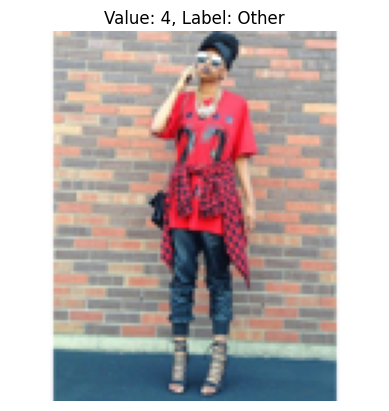

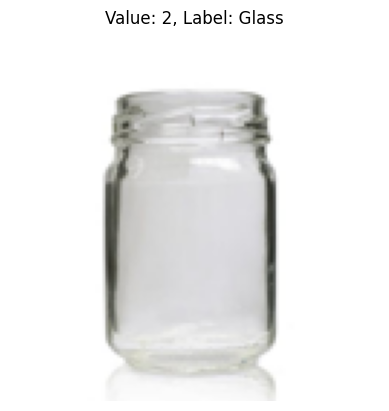

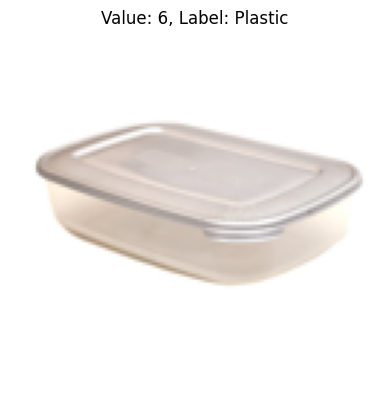

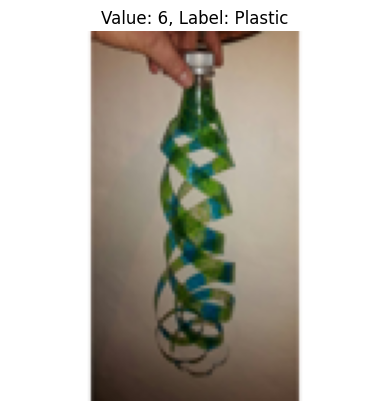

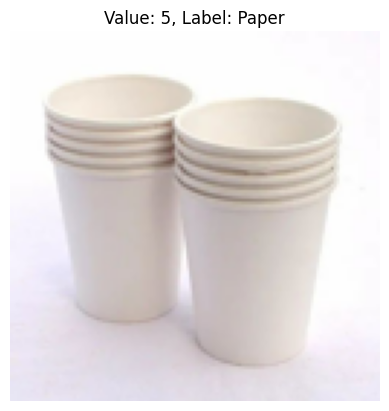

In [40]:
#testing sample codes of vtest data and verifiying if segmentaton as correct
import matplotlib.pyplot as plt


for i in range(5):
    value = y_val[i]
    label = label_encoder.inverse_transform([value])[0]  # Get original label
    image = X_val[i]

    # Display the image, value, and label
    plt.imshow(image)
    plt.title(f"Value: {value}, Label: {label}")
    plt.axis('off')
    plt.show()

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
----------------------------------

***Initial Image Size: *** The initial attempt to train the model using images with a resolution of 256x256 pixels resulted in the Colab kernel crashing, likely due to exceeding memory limitations.

**Image Resizing:** To address the kernel crashes, all images in the dataset were resized to a smaller resolution of 128x128 pixels. This reduction in image size allowed for successful model training within the available computational resources.

**Configuration Exploration:** After resizing, multiple model configurations with varying hyperparameters were tested to identify the best-performing setup.


********
Labels match images: By visually inspecting the images displayed alongside the y_val values and corresponding labels, I was able to confirm that the labels accurately represent the content of the images.
Dataset consistency: This visual validation helps ensure that the dataset is consistent, meaning the labels are correctly assigned to the images.




* Report model training results
------------------------------------
The best performing model configuration was Config 1, which achieved a test accuracy of 66.03%. Here are the hyperparameters for Config 1:

filters: 64
kernel_size: (3, 3)
pool_size: (2, 2)
activation: 'relu'
dropout_rate: 0.3
conv_layers: 3
l2_reg: 0.01
This model was saved as best_model_Config 2.h5 and had a test loss of 2.9900.


I have tried with epchos 10,50 and batches- 32,64,128. Perfromance was little high by spiking epchos with less overfitting along with
64 and 128  batches  which resulted in less validation loss.
